<a href="https://colab.research.google.com/github/anapbatista/InferenciaEstatistica/blob/main/TrabPr%C3%A1tico_Inf_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Trabalho Prático — Inferência Estatística

##  Objetivo

Investigar como os **hábitos diários dos estudantes** impactam seu **desempenho acadêmico**, representado pela **nota no exame final**.

O trabalho visa verificar se variáveis como:

- $\text{Horas de estudo por dia}$
- $\text{Tempo de sono diário}$
- $\text{Uso de redes sociais ou Uso de Netflix}$

estão **estatisticamente associadas** à variável resposta:

- $\text{Nota no exame final (exam\_score)}
$

---

##  Dataset

- Disponível em:  
[Kaggle — Student Habits vs Academic Performance](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)

---

##  Integrantes

- **Ana Paula de Abreu Batista** — Nº USP: 12688424
- **Italo Carlos Martins Bresciani** – Nº USP: 15461782
- **Luiz Gabriel Correia dos Santos** – Nº USP: 15639682
- **João Pedro Barbosa Madeira** - Nº USP: 13683038






### Importação das bibliotecas necessárias

In [41]:
from google.colab import files
import os
import zipfile
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import f
from scipy import stats
import matplotlib.pyplot as plt


### Importação do DataSet

In [42]:
df = pd.read_csv("student_habits_performance.csv")

# Análise Exploratória de dados

In [43]:
df.head() #visualização das 5 primeiras linhas

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [44]:
df.info() #colunas e tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

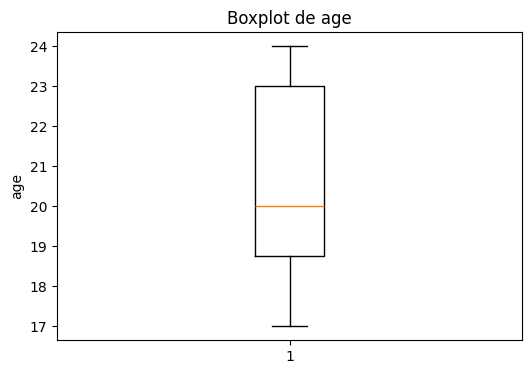

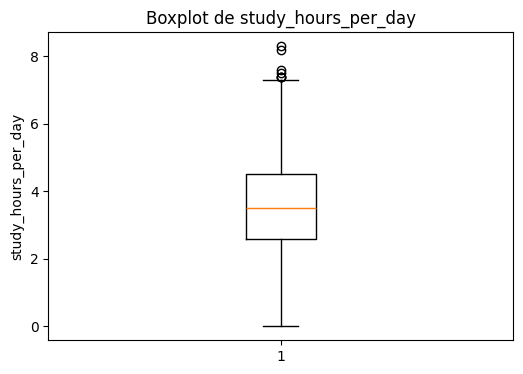

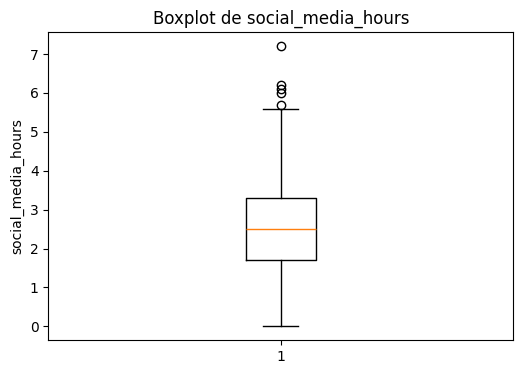

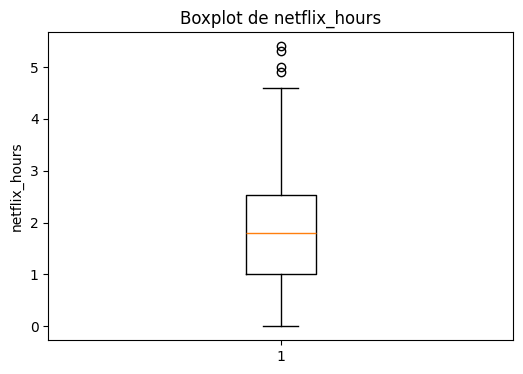

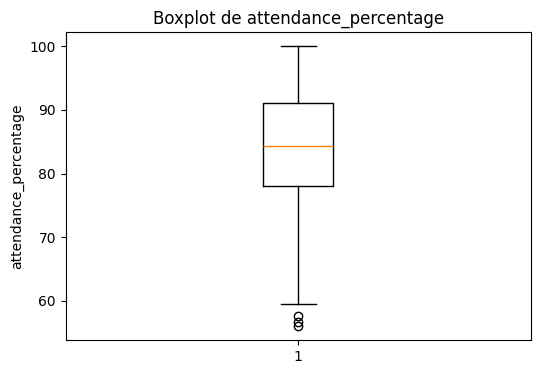

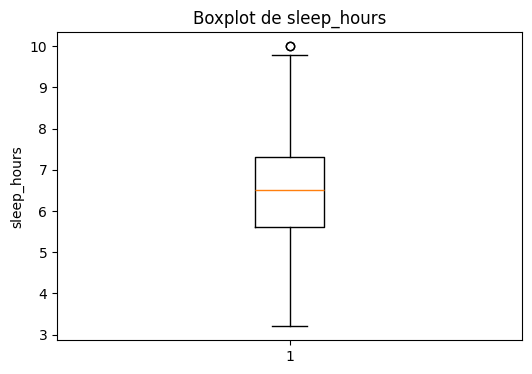

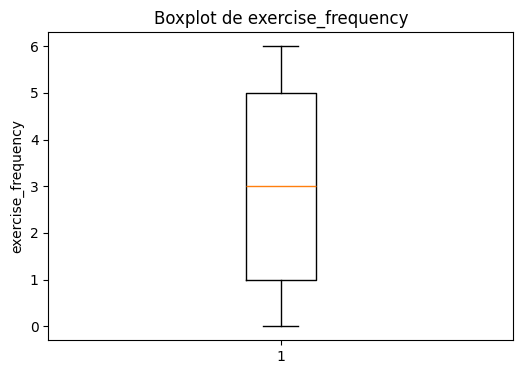

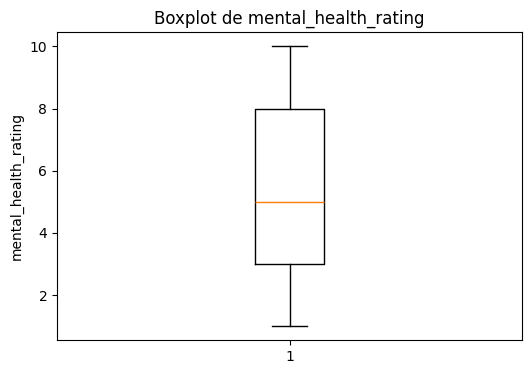

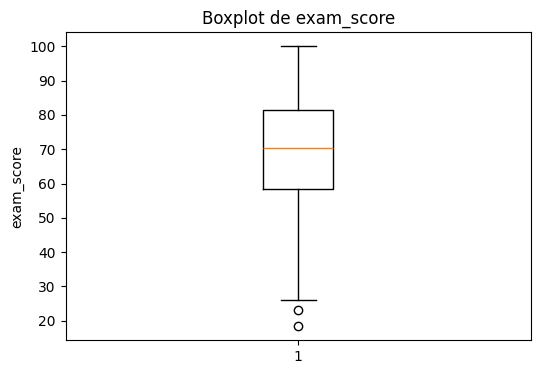

In [45]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for var in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[var])
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)
    plt.show()


## Interpretações dos Boxplots


Boxplot: age (idade dos estudantes)

    A mediana da idade está em 21 anos, indicando que a maioria dos alunos está em uma faixa etária típica do ensino superior.

    A distribuição é ligeiramente assimétrica à esquerda (mais concentrada entre 19 e 22), mas com valores entre 17 e 24 anos.

    Não há outliers, o que sugere uma população relativamente homogênea em termos de idade.


Boxplot : study_hours_per_day (horas de estudo por dia)

    A mediana está em torno de 3 horas por dia, com uma dispersão entre 1 e 5 horas.

    Existem outliers acima de 6 horas, indicando alguns alunos que estudam muito mais que a média.

    Também há um valor mínimo igual a 0, indicando estudantes que não estudam nada por conta própria — o que pode afetar negativamente o desempenho.


Boxplot: social_media_hours (horas de redes sociais)

    A mediana está em aproximadamente 2,8 horas, sugerindo que a maioria dos alunos passa em torno de 3 horas por dia em redes sociais.

    A distribuição é assimétrica à direita, com diversos outliers acima de 6 horas.

    O intervalo interquartil (IQR) está entre 1,5 e 4 horas, indicando que 50% dos alunos usam redes sociais dentro desse intervalo.


Boxplot: netflix_hours (horas de netflix)

    A mediana está próxima de 2 horas, sugerindo um consumo moderado diário da plataforma.

    A distribuição também é assimétrica à direita, com alguns outliers acima de 5 horas.

    O IQR está entre 1 e 3 horas.

Boxplot : attendance_percentage (frequência nas aulas)

    Mediana em torno de 85–90%, o que é um bom nível geral de comparecimento.

    A maioria dos alunos tem entre 75% e 95% de presença, mas há alguns outliers abaixo de 65%, podendo indicar descomprometimento com o curso.


Boxplot : sleep_hours (horas de sono por dia)

    Mediana próxima de 7 horas de sono, o que está dentro do recomendado.

    Há valores mínimos em torno de 3 horas, o que pode representar privação severa de sono.

    Existem outliers acima de 9h, o que pode representar padrões fora do usual (excesso de sono ou má gestão de tempo).

Boxplot: exercise_frequency (frequência de exercícios)

    A mediana está em torno de 3 vezes por semana, com valores entre 0 e 6.

    A distribuição parece simétrica, sem outliers visíveis.

    O IQR vai de 1 a 5, o que demonstra variação considerável de hábitos entre os alunos.

Boxplot : mental_health_rating (classificação da saúde mental)

    A mediana é 5, numa escala de 0 a 10, o que sugere nível médio de saúde mental percebida.

    Distribuição aproximadamente simétrica, com valores variando de 1 a 10.

    O IQR está entre 3 e 8, indicando grande variação de percepção de bem-estar.

Boxplot : exam_score (notas do exame)

    A mediana está próxima de 72, indicando desempenho acadêmico geral satisfatório.

    A distribuição é ligeiramente assimétrica à esquerda, com outliers abaixo de 30, sugerindo alguns alunos com dificuldades significativas.

    O IQR vai de 60 a 85, ou seja, a maioria obteve notas entre essas faixas.


In [46]:
df.describe().round(2)
 #estatísticas das variáveis numéricas

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.50,3.55,2.51,1.82,84.13,6.47,3.04,5.44,69.60
std,2.31,1.47,1.17,1.08,9.40,1.23,2.03,2.85,16.89
min,17.00,0.00,0.00,0.00,56.00,3.20,0.00,1.00,18.40
25%,18.75,2.60,1.70,1.00,78.00,5.60,1.00,3.00,58.48
50%,20.00,3.50,2.50,1.80,84.40,6.50,3.00,5.00,70.50
75%,23.00,4.50,3.30,2.52,91.02,7.30,5.00,8.00,81.32
max,24.00,8.30,7.20,5.40,100.00,10.00,6.00,10.00,100.00


In [47]:
df.isnull().sum()     # quantos valores nulos por coluna

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [48]:
df['gender'].value_counts()  # contagem de valores de variável qualitativa genero


,count
gender,
Female,481
Male,477
Other,42


##  Teste de Normalidade — Shapiro-Wilk

O teste de Shapiro-Wilk foi aplicado às variáveis numéricas do dataset.

- **Hipótese nula (H₀):** a variável segue distribuição normal  
- **Hipótese alternativa (H₁):** a variável **não** segue distribuição normal  
- Nível de significância: $\alpha = 0{,}05$

In [49]:

numericas = df.select_dtypes(include=['float64', 'int64']).columns

for col in numericas:
    stat, p = shapiro(df[col])
    print(f"{col:<30} | p-valor = {p:.2f} | {'Normal' if p > 0.05 else 'Não Normal'}")


age                            | p-valor = 0.00 | Não Normal
study_hours_per_day            | p-valor = 0.11 | Normal
social_media_hours             | p-valor = 0.00 | Não Normal
netflix_hours                  | p-valor = 0.00 | Não Normal
attendance_percentage          | p-valor = 0.00 | Não Normal
sleep_hours                    | p-valor = 0.09 | Normal
exercise_frequency             | p-valor = 0.00 | Não Normal
mental_health_rating           | p-valor = 0.00 | Não Normal
exam_score                     | p-valor = 0.00 | Não Normal


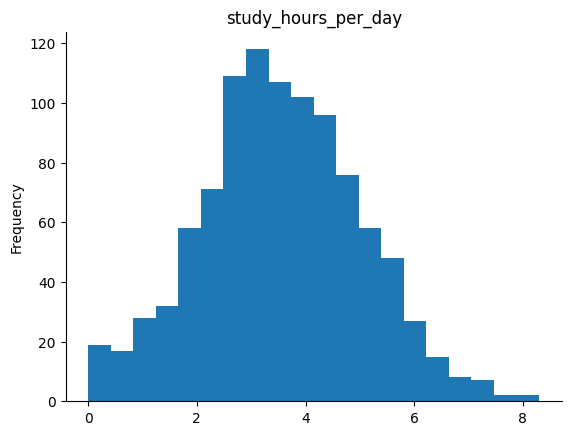

In [50]:
df['study_hours_per_day'].plot(kind='hist', bins=20, title='study_hours_per_day')
plt.gca().spines[['top', 'right',]].set_visible(False)

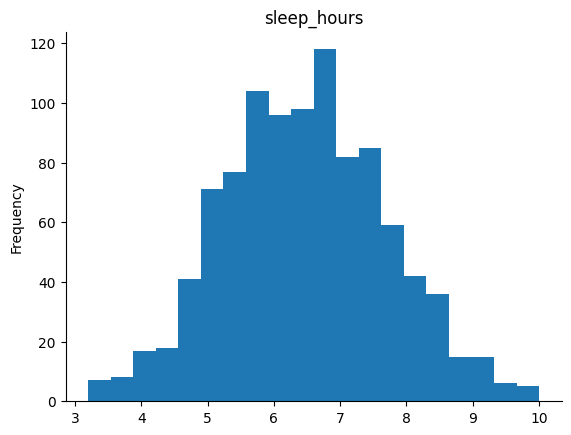

In [51]:
df['sleep_hours'].plot(kind='hist', bins=20, title='sleep_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

##  Conclusão

A maioria das variáveis **não segue distribuição normal**, com exceção de:

- `study_hours_per_day`
- `sleep_hours`

Assim, posteriormente, faremos:

- Uso de **teste não paramétrico** (Mann-Whitney)

---
# 1 Teste de Hipóteses Paramétrico

## 1.1 Teste de média para variância desconhecida
Objetivo: Verificar se os estudantes dormem, em média, uma certa quantidade de horas.<br>
Hipóteses:<br>
H₀: μ <= 6 <br>
H₁: μ > 6

In [52]:

# Variável de interesse
sleep_hours = df['sleep_hours']

# Hipótese nula (μ <= 6)
mu_0 = 6

# Nível de significância
alpha = 0.05

# Teste para o dataset inteiro
t_statistic, p_value = stats.ttest_1samp(sleep_hours, popmean=mu_0, alternative='greater')
print("Teste para o dataset inteiro.")
print(f"Estatística t: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")
if p_value < alpha:
    print(f"Há evidências estatísticas para afirmar que a média de horas de sono dos alunos do dataset inteiro é significativamente MAIOR que {mu_0} horas.")
else:
    print(f"Não há evidências suficientes para afirmar que a média de horas de sono dos alunos do dataset inteiro é significativamente maior que {mu_0} horas.")

print()

# Hipótese nula (μ <= 8)
mu_0 = 7

# Teste para o dataset inteiro
t_statistic, p_value = stats.ttest_1samp(sleep_hours, popmean=mu_0, alternative='greater')
print("Teste para o dataset inteiro.")
print(f"Estatística t: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")
if p_value < alpha:
    print(f"Há evidências estatísticas para afirmar que a média de horas de sono dos alunos do dataset inteiro é significativamente MAIOR que {mu_0} horas.")
else:
    print(f"Não há evidências suficientes para afirmar que a média de horas de sono dos alunos do dataset inteiro é significativamente maior que {mu_0} horas.")

print()

Teste para o dataset inteiro.
Estatística t: 12.1218
Valor p: 0.0000
Há evidências estatísticas para afirmar que a média de horas de sono dos alunos do dataset inteiro é significativamente MAIOR que 6 horas.

Teste para o dataset inteiro.
Estatística t: -13.6638
Valor p: 1.0000
Não há evidências suficientes para afirmar que a média de horas de sono dos alunos do dataset inteiro é significativamente maior que 7 horas.



### 1.1.1 Interpretação do teste

Os testes estatísticos realizados indicam uma possível associação entre o tempo de sono dos alunos e seu desempenho acadêmico. A seguir, os principais achados:

- Comparação com 6 horas de sono:
A estatística t obtida foi 12.1218, com um valor-p praticamente zero. Isso fornece fortes evidências estatísticas de que a média de horas de sono dos alunos é significativamente maior do que 6 horas.

- Comparação com 7 horas de sono:
A estatística t foi -13.6638, com valor-p igual a 1.0000. Nesse caso, não há evidências suficientes para afirmar que a média de sono é maior do que 7 horas. Pelo contrário, os dados sugerem que a média pode estar abaixo desse valor.

Em resumo, os resultados indicam que, em média, os alunos do conjunto de dados dormem significativamente mais de 6 horas por noite, mas não necessariamente alcançam 7 horas completas de sono.

---
## **1.2 Teste para comparação de médias**

### Quem tirou uma nota maior dormiu mais?
Neste teste vamos verificar se os estudantes que tiraram uma nota maior no exame (acima de 6) possuem uma média maior de horas de sono daqueles que tiveram notas menores que 4 no exame. Para isso dividiremos os grupos:


*   Com notas maiores que 60
*   Com notas menores que 40


In [53]:
#Selecionando as Pessoas que tiraram menor que 40 no teste
valores_menores_que_40 = df[df['exam_score'] < 40].copy()
#Média amostral das horas de sono do grupo selecionado:
media_menor_nota = valores_menores_que_40['sleep_hours'].mean()
media_menor_nota #6.28

np.float64(6.288095238095237)

In [54]:
#Pessoas que tiraram maior que 60 no teste
valores_maiores_que_60 = df[df['exam_score'] > 60].copy()
#Média amostral das horas de sono do grupo selecionado:
media_maior_nota = valores_maiores_que_60['sleep_hours'].mean()
media_maior_nota #6.54

np.float64(6.544846796657382)

É possível observar que a média amostral entre os dois grupos é maior no grupo
que tirou uma nota maior no exame realizado, mas essa diferença é estatísticamente significante?

In [55]:
#Verificando se a coluna 'sleep_hours' (com notas maiores que 50) ainda segue uma Normal
stat, p = shapiro(valores_maiores_que_60['sleep_hours'])
print(f"{'sleep_hours':<30} | p-valor = {p:.2f} | {'Normal' if p > 0.05 else 'Não Normal'}")

#Verificando se a coluna 'sleep_hours' (com notas menores que 50) ainda segue uma Normal
stat, p = shapiro(valores_menores_que_40['sleep_hours'])
print(f"{'sleep_hours':<30} | p-valor = {p:.2f} | {'Normal' if p > 0.05 else 'Não Normal'}")

sleep_hours                    | p-valor = 0.21 | Normal
sleep_hours                    | p-valor = 0.80 | Normal


### 1.2.1 Verificação dos casos de testes de comparação de médias
Como temos 2 amostras independentes e com variâncias amostrais, é necessário recorrer ao teste de variâncias para verificar se elas podem ser consideradas iguais ou diferentes para sabermos em qual caso podemos aplicar a comparação de médias!


**Teste para comparação de variâncias:**

$\sigma$x = Variância de sono do grupo com nota maior que 60 no teste

$\sigma$y = Variância de sono do grupo com nota menor que 40 no teste
- **Hipótese nula (H₀):** $\sigma$x = $\sigma$y
- **Hipótese alternativa (H₁):** $\sigma$x $\neq$ $\sigma$y
- Nível de significância: $\alpha = 0{,}05$

In [56]:
# Calcula variância dos dois grupos
var_maior_nota = valores_maiores_que_60['sleep_hours'].var()
var_menor_nota = valores_menores_que_40['sleep_hours'].var()

print("Variância grupo nota > 60:", var_maior_nota)
print("Variância grupo nota < 40:", var_menor_nota)

# Identifica a maior e menor variância para montar o teste F corretamente
var_maior = max(var_maior_nota, var_menor_nota)
var_menor = min(var_maior_nota, var_menor_nota)

# Estatística do teste F
F_calculado = var_maior / var_menor
print("Estatística F calculada:", F_calculado)

Variância grupo nota > 60: 1.4305382610148327
Variância grupo nota < 40: 1.7532694541231124
Estatística F calculada: 1.2256012313010993


In [57]:
# Obtendo os graus de liberdade
n_maior = len(valores_maiores_que_60)
n_menor = len(valores_menores_que_40)

# Graus de liberdade
gl1 = n_maior - 1
gl2 = n_menor - 1

print("Graus de liberdade (gl1, gl2):", gl1, gl2)

Graus de liberdade (gl1, gl2): 717 41


In [58]:
alpha = 0.05

# F crítico superior e inferior para teste bicaudal
F_crit_superior = f.ppf(1 - alpha/2, gl1, gl2)
F_crit_inferior = f.ppf(alpha/2, gl1, gl2)

print("F crítico inferior:", F_crit_inferior)
print("F crítico superior:", F_crit_superior)

if F_calculado < F_crit_inferior or F_calculado > F_crit_superior:
    print("Rejeitamos H0: As variâncias são significativamente diferentes.")
else:
    print("Não rejeitamos H0: As variâncias podem ser consideradas iguais.")

F crítico inferior: 0.66700525632869
F crítico superior: 1.6415007727510724
Não rejeitamos H0: As variâncias podem ser consideradas iguais.


- Com as variâncias consideradas estatísticamente iguais, podemos prosseguir com o teste de comparação de Médias (caso 3A, como imposto pela professora)
- Para isso iremos realizar o teste de hipóteses para ver se a quantidade de horas dormidas é igual nos dois grupos propostos

 **Teste para comparação de médias com Variâncias desconhecidas e iguais**


$\mu$x = Média de sono do grupo com nota maior que 60 no teste

$\mu$y = Média de sono do grupo com nota menor que 40 no teste
- **Hipótese nula (H₀):** $\mu$x = $\mu$y
- **Hipótese alternativa (H₁):** $\mu$x > $\mu$y
- Nível de significância: $\alpha = 0{,}05$

In [59]:
from scipy.stats import t

# Médias amostrais
x_barra1 = media_maior_nota
x_barra2 = media_menor_nota

# Tamanhos das amostras
n1 = len(valores_maiores_que_60)
n2 = len(valores_menores_que_40)

# Variâncias (já calculadas antes)
s1_sq = valores_maiores_que_60['sleep_hours'].var()
s2_sq = valores_menores_que_40['sleep_hours'].var()

# Graus de liberdade
gl = n1 + n2 - 2

- Estatística do teste:


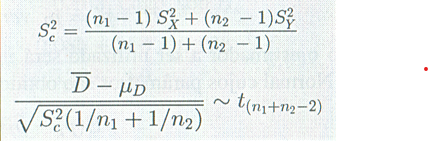

In [60]:
# Média combinada da variância
sp_sq = ((n1 - 1)*s1_sq + (n2 - 1)*s2_sq) / (gl)

# Estatística t
t_calc = (x_barra1 - x_barra2) / ((sp_sq * (1/n1 + 1/n2))**0.5)


# Valor crítico para alfa = 0.05 (bicaudal)
alfa = 0.05
t_crit = t.ppf(1 - alfa/2, df=gl)

# p-valor
from scipy.stats import ttest_ind

# (equal_var=True pois variâncias são iguais)
stat, p_valor = ttest_ind(valores_maiores_que_60['sleep_hours'],
                          valores_menores_que_40['sleep_hours'],
                          equal_var=True)

# Resultados
print(f"t calculado: {t_calc:.2f}")
print(f"t crítico (±): {t_crit:.2f}")
print(f"p-valor: {p_valor:.2f}")


t calculado: 1.34
t crítico (±): 1.96
p-valor: 0.18


In [61]:
if abs(t_calc) > t_crit:
    print("Rejeitamos H0: A diferença entre as médias é estatisticamente significativa.")
else:
    print("Não rejeitamos H0: A diferença entre as médias pode ter ocorrido por acaso.")


Não rejeitamos H0: A diferença entre as médias pode ter ocorrido por acaso.


### 1.2.2 Interpretação do teste

A diferença entre as médias não é estatisticamente significativa ao nível de significância de 5%.

Ou seja, não há evidências suficientes para afirmar que a média de sono das pessoas que se sairam bem no exame (desempenho maior que 60) é maior daquelas que foram pior no mesmo (desempenho menor que 40).

---
# 2 Teste Qui-Quadrado para Indepedência de variáveis qualitativas

###**2.1 Atividades extracurriculares e Exam Score**

A variável **`exam_score`** é numérica contínua, então não pode ser usada diretamente no teste qui-quadrado. Portanto, faremos a transformação de **`exam_score`** em categorias **Baixo**, **Médio** e **Alto**.

In [62]:
def classifica_desempenho(score):
    if score < 40:
        return "Baixo"
    elif score < 75:
        return "Médio"
    else:
        return "Alto"

df["desempenho"] = df["exam_score"].apply(classifica_desempenho)


Queremos avaliar as hipóteses:

$H_0$: A participação em atividades extracurriculares é independente do desempenho no exame (não afeta).

$H_1$: A participação em atividades extracurriculares afeta o desempenho no exame (são dependentes).


In [63]:
from scipy.stats import chi2_contingency
# Tabela de contingência com totais
tabela = pd.crosstab(
    df["extracurricular_participation"],
    df["desempenho"],
    margins=True,
    margins_name="Total"  # nome da linha e coluna de totais
)

print(tabela)


desempenho                     Alto  Baixo  Médio  Total
extracurricular_participation                           
No                              254     27    401    682
Yes                             124     15    179    318
Total                           378     42    580   1000


In [64]:
# Teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela.iloc[:-1, :-1])

print("Valor do qui-quadrado:", chi2)
print("p-valor:", p)

Valor do qui-quadrado: 0.7077545817305576
p-valor: 0.7019610991097891


A região crítica do teste para $g.l. = 2$ e $\alpha$ = 0,05:

In [65]:
from scipy.stats import chi2

valor_critico = chi2.ppf(1 - 0.05, df=2)
print(f"Valor crítico (gl=2, α=0.05): {valor_critico:.4f}")


Valor crítico (gl=2, α=0.05): 5.9915


$
RC = \{q \in \mathbb{R}^+ \; ; \; q > q_c = 5{,}99\}
$


#### 2.1.1 Interpretação do teste

Como o valor do qui-quadrado é bem menor que o valor crítico para gl=2 (aproximadamente 5.991), não estamos na região crítica. Portanto:

**Não rejeitamos H₀ com base na região crítica**.

Como o **`p-valor`** é muito maior que 0.05, também confirma que não rejeitamos $H _0$.

Ou seja, não há evidência estatística de que participar de atividades extracurriculares influencia o desempenho nos exames, com base nesses dados.

###**2.2 Tempo de uso da Netflix e Exam Score**



Queremos avaliar as hipóteses:

$
H_0:$ O tempo de uso da Netflix é independente do desempenho no exame.


$
H_1:$ O tempo de uso da Netflix afeta o desempenho no exame (são dependentes).


A variável **`netflix_hours`** é numérica contínua, então não pode ser usada diretamente no teste qui-quadrado. Portanto, faremos a transformação de **`netflix_hours`** em categorias **Pouco**, **Moderado** e **Muito**.


In [66]:
def classifica_netflix(horas):
    if horas < 2:
        return "Pouco"
    elif horas < 3:
        return "Moderado"
    else:
        return "Muito"

df["tempo_netflix"] = df["netflix_hours"].apply(classifica_netflix)


In [67]:
tabela2 = pd.crosstab(df["tempo_netflix"], df["desempenho"], margins=True, margins_name="Total")
print(tabela2)


desempenho     Alto  Baixo  Médio  Total
tempo_netflix                           
Moderado         98     12    188    298
Muito            49     12     99    160
Pouco           231     18    293    542
Total           378     42    580   1000


In [68]:
chi2, p, dof, expected = chi2_contingency(tabela2.iloc[:-1, :-1])  # ignora a linha/coluna de totais

print(f"Valor do qui-quadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Graus de liberdade: {dof}")

Valor do qui-quadrado: 15.776064997352512
p-valor: 0.0033348526287246506
Graus de liberdade: 4


A região crítica do teste para $g.l. = 4$ e $\alpha$ = 0,05:

In [69]:
from scipy.stats import chi2

valor_critico = chi2.ppf(1 - 0.05, df=4)
print(f"Valor crítico (gl=4, α=0.05): {valor_critico:.4f}")


Valor crítico (gl=4, α=0.05): 9.4877


$
RC = \{q \in \mathbb{R}^+ \; ; \; q > q_c = 9{,}49\}
$


#### 2.2.1 Interpretação do teste

Como o valor do qui-quadrado é maior que o valor crítico para gl=4 (aproximadamente 9.487), estamos na região crítica. Portanto:

**Rejeitamos H₀ com base na região crítica**.

Como o **`p-valor`** é menor que 0.05,isso também confirma que devemos rejeitamos $H _0$.

Ou seja, há evidência estatística de que passar muito tempo assistindo Netflix influencia o desempenho nos exames, com base nesses dados.

## 2.3 Correlação de Spearman

Como o teste qui-quadrado de independência indicou uma associação estatisticamente significativa entre o tempo de uso da Netflix (classificado em categorias) e o desempenho nos exames (também categorizado), buscamos aprofundar essa análise utilizando uma abordagem que preserve as características originais dos dados.

Para isso, aplicamos a correlação de Spearman, que avalia a relação monotônica entre duas variáveis contínuas — neste caso, o número de horas diárias assistindo à Netflix (`netflix_hours`) e a nota final no exame (`exam_score`). Essa técnica permite verificar se há uma tendência crescente ou decrescente entre essas variáveis, sem necessidade de assumir linearidade ou normalidade dos dados.

Dessa forma, a correlação de Spearman complementa o resultado do teste qui-quadrado, oferecendo uma análise mais precisa e sensível da associação entre o tempo de exposição à Netflix e o desempenho acadêmico.

In [70]:
from scipy.stats import spearmanr

# Calcula a correlação de Spearman
correlacao, p_valor = spearmanr(df["netflix_hours"], df["exam_score"])

# Mostra os resultados
print(f"Coeficiente de Spearman: {correlacao:.4f}")
print(f"p-valor: {p_valor:.4f}")

# Interpretação automática
if p_valor < 0.05:
    if correlacao < 0:
        print("Interpretação: Existe uma correlação negativa significativa entre o tempo de uso da Netflix e a nota no exame.\n"
              "Ou seja, quanto mais tempo os estudantes assistem à Netflix, menor tende a ser o desempenho.")
    elif correlacao > 0:
        print("Interpretação: Existe uma correlação positiva significativa entre o tempo de uso da Netflix e a nota no exame.\n"
              "Ou seja, quanto mais tempo os estudantes assistem à Netflix, maior tende a ser o desempenho.")
    else:
        print("Interpretação: Embora o p-valor indique significância, o coeficiente é zero. Isso sugere ausência de correlação monotônica.")
else:
    print("Interpretação: Não há evidência estatística de correlação monotônica entre o tempo de uso da Netflix e a nota no exame.")


Coeficiente de Spearman: -0.1652
p-valor: 0.0000
Interpretação: Existe uma correlação negativa significativa entre o tempo de uso da Netflix e a nota no exame.
Ou seja, quanto mais tempo os estudantes assistem à Netflix, menor tende a ser o desempenho.


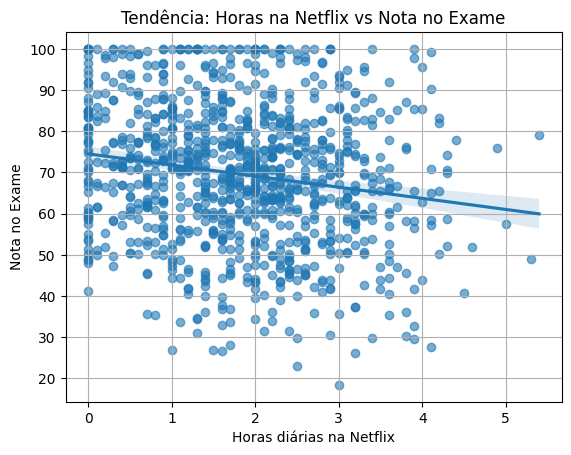

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico com linha de tendência (ajuste de regressão não paramétrica)
sns.regplot(x="netflix_hours", y="exam_score", data=df, scatter_kws={"alpha": 0.6})
plt.title("Tendência: Horas na Netflix vs Nota no Exame")
plt.xlabel("Horas diárias na Netflix")
plt.ylabel("Nota no Exame")
plt.grid(True)
plt.show()


### 2.3.1 Interpretação do teste

O gráfico de dispersão mostra uma tendência decrescente entre o número de horas assistindo à Netflix por dia e a nota no exame. Conforme o tempo gasto na plataforma aumenta, observa-se uma redução no desempenho acadêmico dos estudantes.

Essa tendência visual corrobora o resultado da correlação de Spearman, que indicou uma correlação negativa significativa entre as duas variáveis. Embora os pontos estejam dispersos (com variabilidade natural dos dados), a inclinação geral da nuvem de pontos sugere que um maior consumo de Netflix está associado a notas mais baixas

---
# 3 Teste Não Paramétrico (Mann-Whitney)

## 3.1 O uso de redes sociais tem associação com o resultado no exame?

Para responder essa questão, aplicaremos o teste de Mann-Whitney (não-paramétrico) no conjunto de dados em questão separando os estudantes em dois grupos distintos:

- Grupo A: estudantes que passaram MAIS de 4 HORAS nas redes sociais POR DIA.
- Grupo B: estudante que passaram MENOS de 1 HORA nas redes sociais POR DIA.

Hipóteses:

- $H_0: M_A = M_A$ (mediana dos dois grupos nos resultados dos exames são iguais)

- $H_1: M_B > M_A$ (resultado mediano do grupo B é maior que o resultado mediano do grupo A)

Estatística do Teste U:

Para calcular a estatística U, primeiro calculamos dois valores, um para cada grupo ($U_A$ e $U_B$​), e depois selecionamos o menor deles. As fórmulas são:

$$U_1 = n_1 n_2 + \frac{n_1(n_1 + 1)}{2} - R_1$$

$$U_2 = n_1 n_2 + \frac{n_2(n_2 + 1)}{2} - R_2$$

A estatística do teste final é:

$$U=min(U_1​, U_2​)$$

Visualização Geral das horas diárias gastas em redes sociais

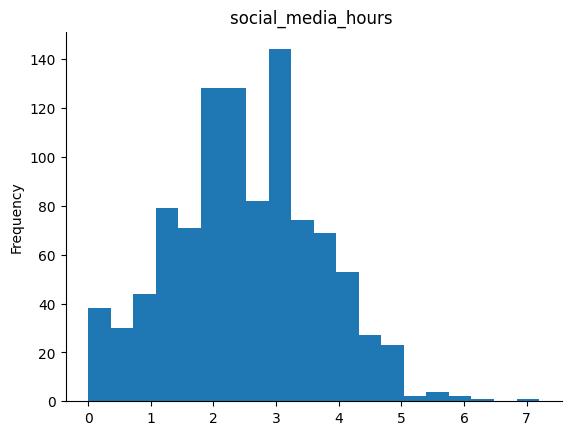

In [72]:
from matplotlib import pyplot as plt
df['social_media_hours'].plot(kind='hist', bins=20, title='social_media_hours ')
plt.gca().spines[['top', 'right',]].set_visible(False)

Divisão dos grupos

In [73]:
# Grupo A: estudantes que gastaram mais de 4 horas nas redes sociais
grupo_a = df[df['social_media_hours'] > 4]

# Grupo B: estudantes que gastaram menos de 1 hora nas redes sociais
grupo_b = df[df['social_media_hours'] < 1]

# Extrair apenas a coluna com as notas do exame para o teste
notas_grupo_a = grupo_a['exam_score']
notas_grupo_b = grupo_b['exam_score']

Região Crítica

Quando os tamanhos das amostras são grandes, a distribuição de U se aproxima de uma distribuição Normal (Z).

In [74]:
from scipy import stats

alpha = 0.05

# Usamos a "Percent Point Function" (ppf) que é o inverso da CDF.
# Para um teste unilateral à direita, usamos 1-alpha diretamente.
z_critico = stats.norm.ppf(1 - alpha)

print(f"Para um teste unilateral com alpha = {alpha}, o valor crítico de U é: {z_critico:.4f}")

Para um teste unilateral com alpha = 0.05, o valor crítico de U é: 1.6449


$
RC = \{ U \mid Z \geq 1.6449 \}
$

Realização do teste de Mann-Whitney

In [75]:
from scipy import stats

# Realização do Teste de Mann-Whitney

# Para testar se o Grupo B > Grupo A, usamos o parâmetro alternative='greater'
u_statistic, p_value = stats.mannwhitneyu(notas_grupo_b, notas_grupo_a, alternative='greater')

# Apresentação dos resultados
print("--- Resultados do teste de Mann-Whitney ---")
print(f"Estatística U: {u_statistic:.2f}")
print(f"P-valor: {p_value:.6f}")
print("---------------------------------------------")

# Interpretação com um nível de significância de 5% (alpha = 0.05)
alpha = 0.05

if p_value < alpha:
    print("\nConclusão: Rejeitamos a hipótese nula (H0).")
else:
    print("\nConclusão: Falhamos em rejeitar a hipótese nula (H0).")

--- Resultados do teste de Mann-Whitney ---
Estatística U: 6236.50
P-valor: 0.000045
---------------------------------------------

Conclusão: Rejeitamos a hipótese nula (H0).


#### 3.2 Interpretação do teste

A estatística U obtida foi de 6236.50, valor que pertence à região crítica. Logo, com relevância estatística alta, podemos concluir que estudantes do grupo B tiveram um desempenho melhor no exame do que o grupo A.

Ou seja, os resultados sugerem que há uma associação entre o uso exagerado de redes sociais e um desempenho acadêmico pior.

---
# Conclusão Geral

A partir dos testes estatísticos realizados, observa-se que certos hábitos cotidianos dos estudantes apresentam associação significativa com seu desempenho acadêmico.

De forma geral, os alunos dormem mais de 6 horas por noite, mas não necessariamente atingem as 7 horas completas. No entanto, não há evidências de que o tempo de sono, isoladamente, esteja associado a um melhor desempenho, já que a comparação entre os grupos com notas altas e baixas não mostrou diferença significativa na média de horas dormidas.

Além disso, não foi identificada uma relação estatisticamente significativa entre a participação em atividades extracurriculares e o desempenho acadêmico.

Por outro lado, os dados apontam para uma influência negativa do uso excessivo de plataformas como Netflix e redes sociais, sugerindo que esses comportamentos estão associados a piores resultados nos exames. Essa conclusão é reforçada pelo teste de Mann-Whitney, que indicou que o grupo com menor uso obteve desempenho significativamente melhor.

Em síntese, os resultados sugerem que há hábitos que impactam o desempenho acadêmico dos alunos, especialmente aqueles relacionados ao uso excessivo de mídias digitais, enquanto outros, como o tempo de sono e a participação em atividades extracurriculares, não demonstraram relação estatística significativa com os resultados nas avaliações.

